<a href="https://colab.research.google.com/github/SatyaHarshithaDanda/British-Airways-Data-Science-Job-Simulation/blob/main/British_Airways.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Data Collection**
In this phase we will collect the customer ratings data from the airline quality website called [Skytrax](https://www.airlinequality.com/airline-reviews/british-airways). We will collect data about airline ratings, seat ratings and lounge experience ratings from this website.

In [ ]:
#imports
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

#regex
import re

In [ ]:
#create an empty list to collect all reviews
reviews  = []

#create an empty list to collect rating stars
stars = []

#create an empty list to collect date
date = []

#create an empty list to collect country the reviewer is from
country = []

In [ ]:
for i in range(1, 36):
    page = requests.get(f"https://www.airlinequality.com/airline-reviews/british-airways/page/{i}/?sortby=post_date%3ADesc&pagesize=100")

    soup = BeautifulSoup(page.content, "html5")

    for item in soup.find_all("div", class_="text_content"):
        reviews.append(item.text)

    for item in soup.find_all("div", class_ = "rating-10"):
        try:
            stars.append(item.span.text)
        except:
            print(f"Error on page {i}")
            stars.append("None")

    #date
    for item in soup.find_all("time"):
        date.append(item.text)

    #country
    for item in soup.find_all("h3"):
        country.append(item.span.next_sibling.text.strip(" ()"))

Error on page 32
Error on page 34
Error on page 34


In [ ]:
#check the length of total reviews extracted
len(reviews)

3500

In [ ]:
print("Length of reviews:", len(reviews))
print("Length of stars:", len(stars))
print("Length of date:", len(date))
print("Length of country:", len(country))

Length of reviews: 3500
Length of stars: 3535
Length of date: 3500
Length of country: 3500


In [ ]:
#check the length
stars = stars[:3418]

In [ ]:
#create  a dataframe from these collected lists of data
# Truncate the reviews, date, and country arrays to match the length of the stars array
reviews = reviews[:len(stars)]
date = date[:len(stars)]
country = country[:len(stars)]

# Create DataFrame
df = pd.DataFrame({"reviews": reviews, "stars": stars, "date": date, "country": country})


In [ ]:
df.head()

,reviews,stars,date,country
0,✅ Trip Verified | I am a British Airways Gold ...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t5,11th February 2024,United States
1,Not Verified | Another case of reviewing Brit...,5,8th February 2024,United Kingdom
2,✅ Trip Verified | On the memorable day of Janu...,1,6th February 2024,Nigeria
3,Not Verified | I did not actually get to fly w...,8,5th February 2024,United Kingdom
4,✅ Trip Verified | We had possibly the worse ch...,1,2nd February 2024,United Kingdom


In [ ]:
df.shape

(3418, 4)

### Export the data into a csv format

In [ ]:
import os

cwd = os.getcwd()
df.to_csv(cwd+ "/BA_reviews.csv")

# **Data Cleaning**

In [ ]:
#create a dataframe from csv file

cwd = os.getcwd()

df = pd.read_csv(cwd+"/BA_reviews.csv", index_col=0)

We will also create a column which mentions if the user is verified or not.

In [ ]:
df['verified'] = df.reviews.str.contains("Trip Verified")

In [ ]:
df['verified']

0        True
1       False
2        True
3       False
4        True
        ...  
3413    False
3414    False
3415    False
3416    False
3417    False
Name: verified, Length: 3418, dtype: bool

# Cleaning Reviews

We will extract the column of reviews into a separate dataframe and clean it for semantic analysis

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
#for lemmatization of words we will use nltk library
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
lemma = WordNetLemmatizer()


reviews_data = df.reviews.str.strip("✅ Trip Verified |")

#create an empty list to collect cleaned data corpus
corpus =[]

#loop through each review, remove punctuations, small case it, join it and add it to corpus
for rev in reviews_data:
    rev = re.sub('[^a-zA-Z]',' ', rev)
    rev = rev.lower()
    rev = rev.split()
    rev = [lemma.lemmatize(word) for word in rev if word not in set(stopwords.words("english"))]
    rev = " ".join(rev)
    corpus.append(rev)

In [ ]:
# add the corpus to the original dataframe
df['corpus'] = corpus

In [ ]:
df.head()

,reviews,stars,date,country,verified,corpus
0,✅ Trip Verified | I am a British Airways Gold ...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t5,11th February 2024,United States,True,british airway gold guest list member lifetime...
1,Not Verified | Another case of reviewing Brit...,5,8th February 2024,United Kingdom,False,verified another case reviewing british airway...
2,✅ Trip Verified | On the memorable day of Janu...,1,6th February 2024,Nigeria,True,memorable day january th family embarked journ...
3,Not Verified | I did not actually get to fly w...,8,5th February 2024,United Kingdom,False,verified actually get fly ba cancelled flight ...
4,✅ Trip Verified | We had possibly the worse ch...,1,2nd February 2024,United Kingdom,True,possibly worse check experience ever ever took...


# Cleaning/Format date

In [ ]:
df.dtypes

reviews     object
stars       object
date        object
country     object
verified      bool
corpus      object
dtype: object

In [ ]:
# convert the date to datetime format
df.date = pd.to_datetime(df.date)

In [ ]:
df.date.head()

0   2024-02-11
1   2024-02-08
2   2024-02-06
3   2024-02-05
4   2024-02-02
Name: date, dtype: datetime64[ns]

# Cleaning ratings with stars

In [ ]:
#check for unique values
df.stars.unique()

array(['\n\t\t\t\t\t\t\t\t\t\t\t\t\t5', '5', '1', '8', '6', '9', '3', '2',
       '4', '10', '7', 'None'], dtype=object)

In [ ]:
# remove the \t and \n from the ratings
df.stars = df.stars.str.strip("\n\t\t\t\t\t\t\t\t\t\t\t\t\t")

In [ ]:
df.stars.value_counts()

1       830
2       398
3       389
8       332
10      277
9       271
7       269
5       242
4       235
6       172
None      3
Name: stars, dtype: int64

There are 3 rows having values "None" in the ratings. We will drop all these 3 rows.

In [ ]:
# drop the rows where the value of ratings is None
df.drop(df[df.stars == "None"].index, axis=0, inplace=True)

In [ ]:
#check the unique values again
df.stars.unique()

array(['5', '1', '8', '6', '9', '3', '2', '4', '10', '7'], dtype=object)

# Check for null Values

In [ ]:
df.isnull().value_counts()

reviews  stars  date   country  verified  corpus
False    False  False  False    False     False     3413
                       True     False     False        2
dtype: int64

In [ ]:
df.country.isnull().value_counts()

False    3413
True        2
Name: country, dtype: int64

We have two missing values for country. For this we can just remove those two reviews (rows) from the dataframe.

In [ ]:
#drop the rows using index where the country value is null
df.drop(df[df.country.isnull() == True].index, axis=0, inplace=True)

In [ ]:
df.shape

(3413, 6)

In [ ]:
#resetting the index
df.reset_index(drop=True)

,reviews,stars,date,country,verified,corpus
0,✅ Trip Verified | I am a British Airways Gold ...,5,2024-02-11,United States,True,british airway gold guest list member lifetime...
1,Not Verified | Another case of reviewing Brit...,5,2024-02-08,United Kingdom,False,verified another case reviewing british airway...
2,✅ Trip Verified | On the memorable day of Janu...,1,2024-02-06,Nigeria,True,memorable day january th family embarked journ...
3,Not Verified | I did not actually get to fly w...,8,2024-02-05,United Kingdom,False,verified actually get fly ba cancelled flight ...
4,✅ Trip Verified | We had possibly the worse ch...,1,2024-02-02,United Kingdom,True,possibly worse check experience ever ever took...
...,...,...,...,...,...,...
3408,777-200 4-class refitted with the new World Tr...,1,2014-10-13,United Kingdom,False,class refitted new world traveller wt plus cab...
3409,Booked a seat in World Traveller (Ecomomy) for...,1,2014-10-13,Ireland,False,booked seat world traveller ecomomy extra way ...
3410,We flew BA from London to Dulles DC 10/8/2014....,9,2014-10-12,United States,False,flew ba london dulles dc unfortunately seated ...
3411,B787. Just returned from a London - Toronto - ...,9,2014-10-12,United Kingdom,False,b returned london toronto london flight ba app...


Now our data is all cleaned and ready for data visualization and data analysis.

In [ ]:
# export the cleaned data
df.to_csv(cwd + "/cleaned-BA-reviews.csv")

# **Exploratory Data Analysis**

In [ ]:
import plotly.express as px

import datetime as dt

from wordcloud import WordCloud, STOPWORDS

In [ ]:
# create the dataframe
cwd = os.getcwd()
df = pd.read_csv(cwd+"/cleaned-BA-reviews.csv", index_col=0)

#let's also check the index are in order
df = df.reset_index(drop=True)

In [ ]:
df.head()

,reviews,stars,date,country,verified,corpus
0,✅ Trip Verified | I am a British Airways Gold ...,5,2024-02-11,United States,True,british airway gold guest list member lifetime...
1,Not Verified | Another case of reviewing Brit...,5,2024-02-08,United Kingdom,False,verified another case reviewing british airway...
2,✅ Trip Verified | On the memorable day of Janu...,1,2024-02-06,Nigeria,True,memorable day january th family embarked journ...
3,Not Verified | I did not actually get to fly w...,8,2024-02-05,United Kingdom,False,verified actually get fly ba cancelled flight ...
4,✅ Trip Verified | We had possibly the worse ch...,1,2024-02-02,United Kingdom,True,possibly worse check experience ever ever took...


#What is the average overall rating given for British Airways?

In [ ]:
df.stars.mean()

4.602988573102842

#What is the total counts for each ratings?


Text(0.5, 0.98, 'Counts for each ratings')

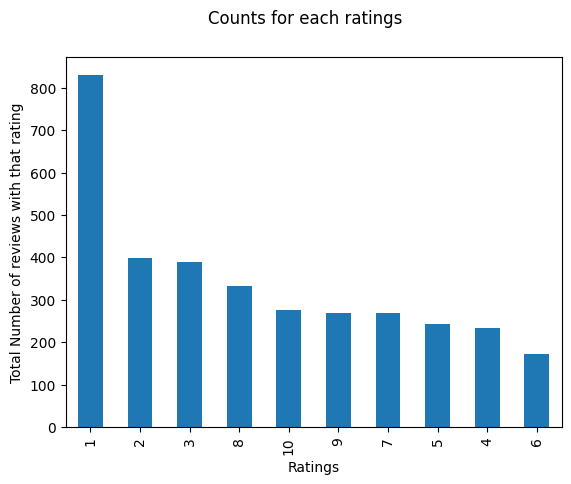

In [ ]:
df.stars.value_counts().plot(kind="bar")
plt.xlabel("Ratings")
plt.ylabel("Total Number of reviews with that rating")
plt.suptitle("Counts for each ratings")

In [ ]:
df_ratings = pd.DataFrame(df.stars.value_counts())
pct_values = (df_ratings.stars.values/ df_ratings.stars.values.sum() *100).tolist()
pct_values = [round(x,2) for x in pct_values]
df_ratings['pct_values'] = pct_values

In [ ]:
#resetting index as we do not want to confuse between the index and the rating values
df_ratings = df_ratings.reset_index()

In [ ]:
# renaming columns
df_ratings.rename(columns={'index':'Stars', 'stars':'total_counts'}, inplace=True)

In [ ]:
df_ratings

,Stars,total_counts,pct_values
0,1,830,24.32
1,2,398,11.66
2,3,389,11.40
3,8,332,9.73
4,10,277,8.12
5,9,270,7.91
6,7,269,7.88
7,5,242,7.09
8,4,234,6.86
9,6,172,5.04


<ipython-input-45-f9c1669a6e38>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df_ratings.Stars, y=df_ratings.total_counts, data=df_ratings, errwidth=0,
<ipython-input-45-f9c1669a6e38>:2: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0}` instead.

  ax = sns.barplot(x=df_ratings.Stars, y=df_ratings.total_counts, data=df_ratings, errwidth=0,


Text(0.5, 1.0, 'Counts for each ratings')

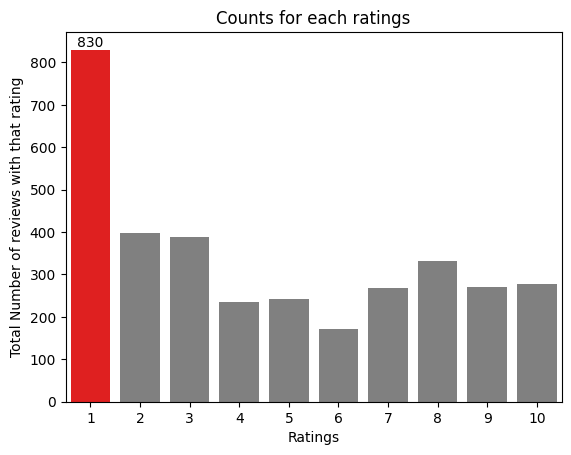

In [ ]:
clrs = ['Red' if (x ==  max(df_ratings.total_counts)) else 'grey' for x in df_ratings.total_counts ]
ax = sns.barplot(x=df_ratings.Stars, y=df_ratings.total_counts, data=df_ratings, errwidth=0,
                palette=clrs)


ax.bar_label(ax.containers[0])

ax.set_xlabel("Ratings")
ax.set_ylabel("Total Number of reviews with that rating")
ax.set_title("Counts for each ratings")

In [ ]:
# Unique countries BA recieved the reviews from

print(f"{len(df.country.unique())} unique countries")

70 unique countries


#Which country most review comes from?


In [ ]:
df_country_review = pd.DataFrame(df.country.value_counts().head()).reset_index()

In [ ]:
df_country_review.rename(columns={'index':'country','country':'total_reviews'}, inplace=True)

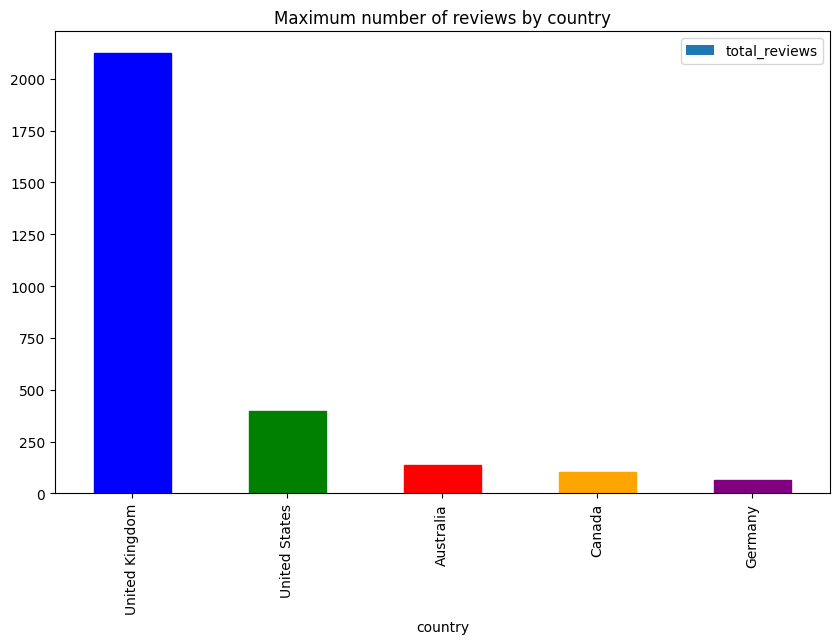

In [ ]:
# Setting figure and ax into variables
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the bar plot with specified x-axis
df_country_review.plot(kind="bar", x='country', ax=ax)

# Adding title
plt.title("Maximum number of reviews by country")

# Customizing colors for each bar
colors = ['blue', 'green', 'red', 'orange', 'purple']  # Add more colors if needed
for i, bar in enumerate(ax.patches):
    bar.set_color(colors[i % len(colors)])  # Cycle through colors

# Showing the plot
plt.show()

#Which country provided on average highest ratings?


In [ ]:
df_country_rating = pd.DataFrame(df.groupby('country').mean()['stars'].sort_values(ascending=False)).reset_index()

<ipython-input-50-d2bd358aa525>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_country_rating = pd.DataFrame(df.groupby('country').mean()['stars'].sort_values(ascending=False)).reset_index()


In [ ]:
df_country_rating.rename(columns={'stars':'avg_rating'}, inplace=True)

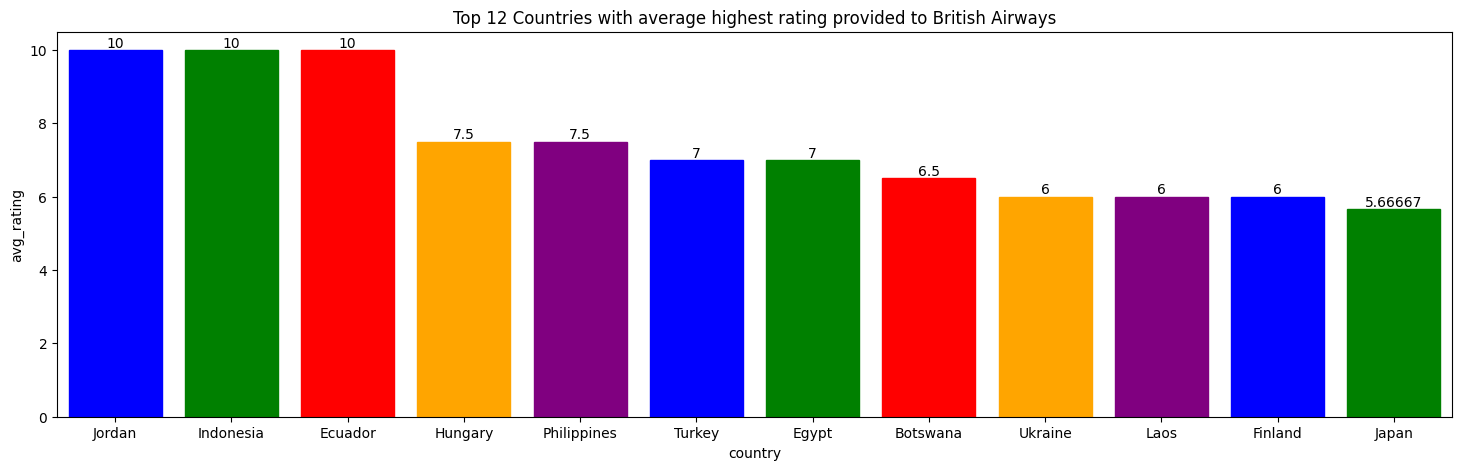

In [ ]:
# Setting figure and axes
fig, ax = plt.subplots(figsize=(18, 5))

# Plotting the bar plot
ax1 = sns.barplot(x='country', y='avg_rating', data=df_country_rating[:12], ax=ax)

# Adding labels to the bars
for container in ax1.containers:
    ax1.bar_label(container)

# Customizing colors for each bar
colors = ['blue', 'green', 'red', 'orange', 'purple']  # Add more colors if needed
for i, bar in enumerate(ax1.patches):
    bar.set_color(colors[i % len(colors)])  # Cycle through colors

# Setting title
ax.set_title("Top 12 Countries with average highest rating provided to British Airways")

# Showing the plot
plt.show()

#Time Series Analysis

In [ ]:
#convert the date datatype to datetime
df.date = pd.to_datetime(df.date)

In [ ]:
fig = px.line(df, x='date', y="stars")
fig.update_xaxes(rangeslider_visible=True)
fig.show()

It can be seen that between April 2020 to August 2021 there has been a decline in reviews due to Covid Pandemic travel restrictions. Not much can be inferred at this point as the dates we have are the when the customers posted their reviews which does not take into account the actual flight date. Hence no particular significan trend is visible from the plot.

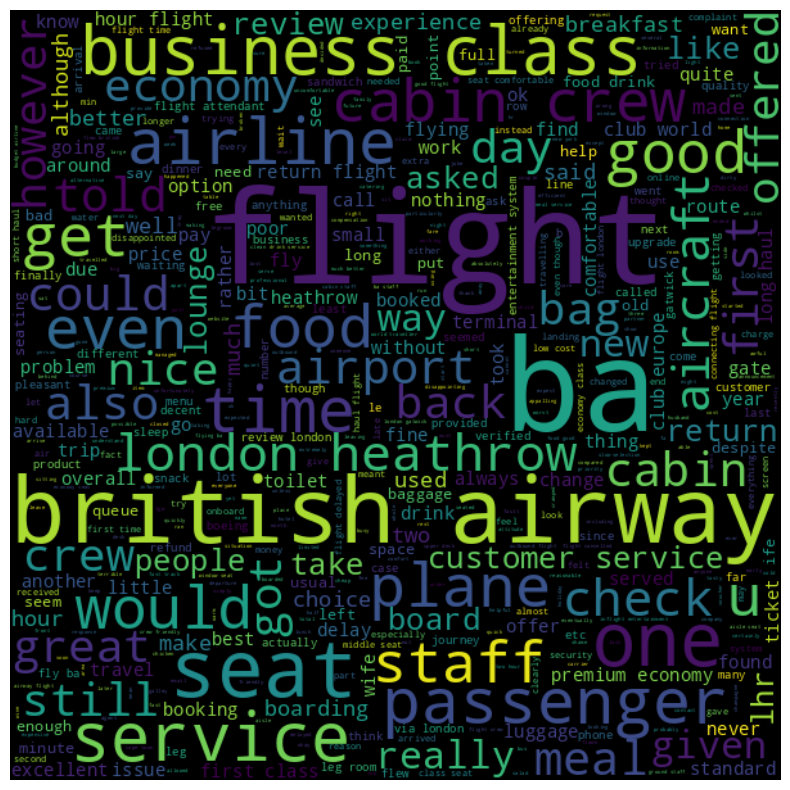

In [ ]:
import nltk
from nltk.corpus import stopwords
# Start with one review:
reviews = " ".join(df.corpus)
plt.figure(figsize=(20,10))

stopwords = set(stopwords.words('english'))

# Create and generate a word cloud image:
wordcloud = WordCloud(height=600,width=600,max_font_size=100, max_words=500, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

There are many words that does not set the idea of whether the review is positive or negative. For example words like "passenger", "flight", etc. does not add conlcusive value hence we can include them in stopwords list.

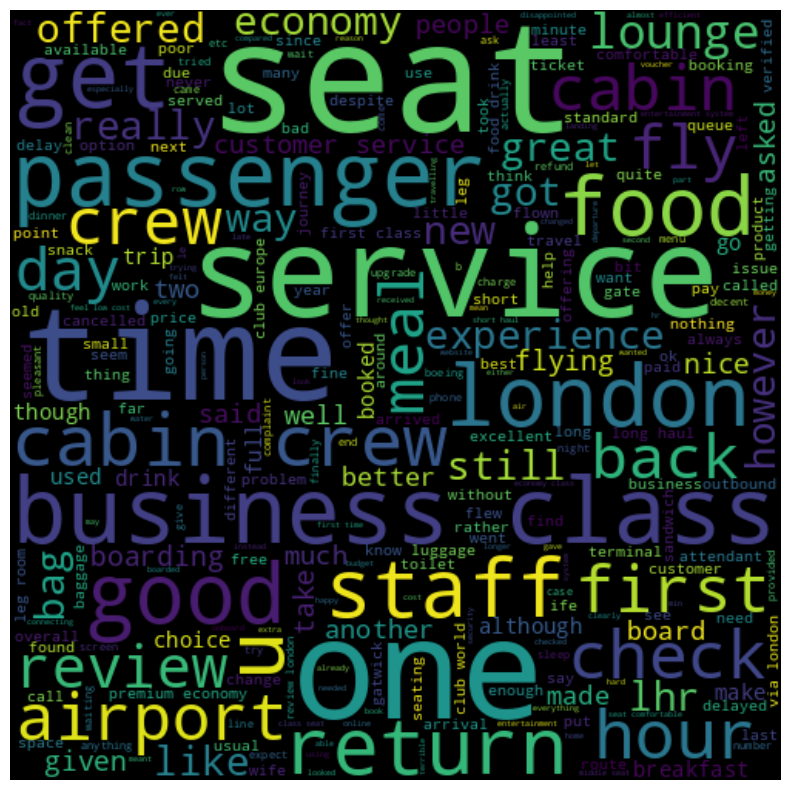

In [ ]:
import nltk
from nltk.corpus import stopwords
reviews = " ".join(df.corpus)
plt.figure(figsize=(20,10))

stopwords = set(stopwords.words('english'))
stopwords.update(["ba","flight", "british","airway", "airline","plane", "told","also","passenger" \
                 "london", "heathrow", "aircraft", "could","even", "would"])
# Create and generate a word cloud image:
wordcloud = WordCloud(height=500,width=500,max_font_size=100, max_words=300, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#Word Frequency

In [ ]:
from nltk import ngrams
from nltk.probability import FreqDist

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

#split the text of all reviews into a list of words
words = reviews.split(" ")

#remove certain words that will not be used to determine the positive or negative sentiment
stopwords = text.ENGLISH_STOP_WORDS.union(['flight', 'ba', "passenger","u", "london","airway","british","airline",\
                                           "heathrow","plane","lhr","review"])


new_words = [word for word in words if word not in stopwords]

nlp_words=FreqDist(new_words).most_common(20)

#create a dataframe of these word and its frequencies
all_fdist = pd.Series(dict(nlp_words))

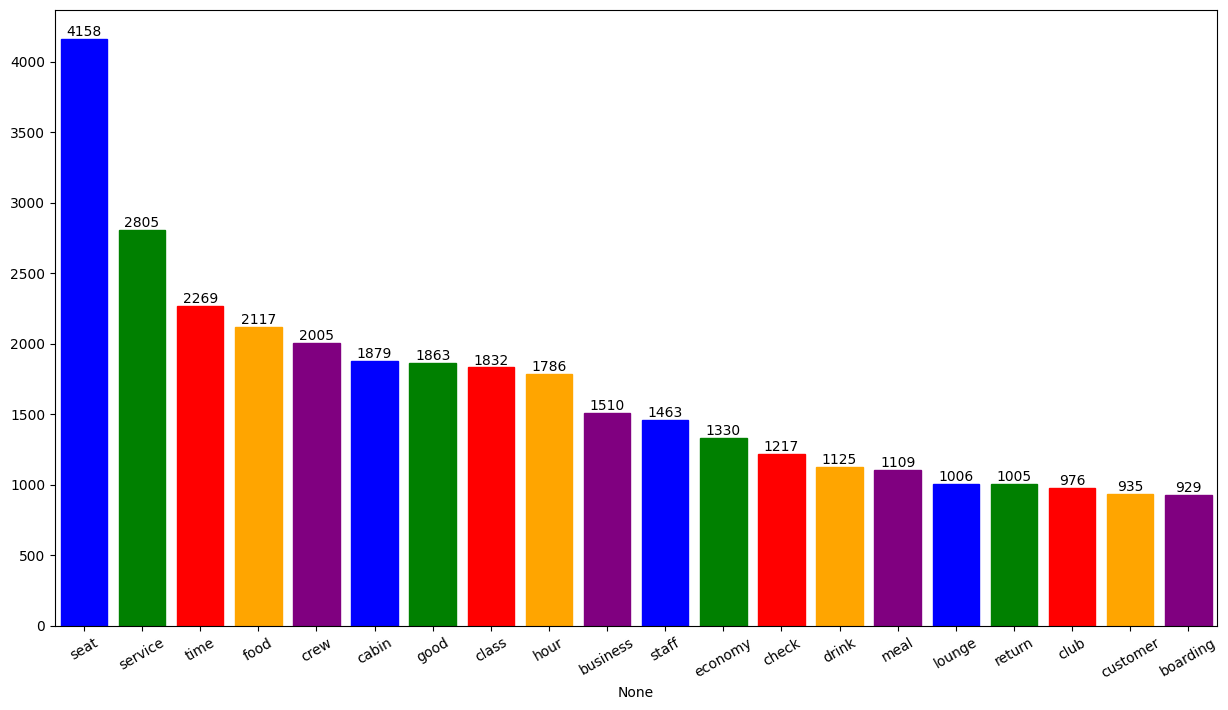

In [ ]:
# Setting figure and ax into variables
fig, ax = plt.subplots(figsize=(15,8))

# Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)

# Adding labels to the bars
for container in all_plot.containers:
    all_plot.bar_label(container)

# Customizing colors for each bar
colors = ['blue', 'green', 'red', 'orange', 'purple']  # Add more colors if needed
for i, bar in enumerate(all_plot.patches):
    bar.set_color(colors[i % len(colors)])  # Cycle through colors

# Rotating xticks for better readability
plt.xticks(rotation=30)

# Showing the plot
plt.show()


This gives us a glimpse of what customers are really talking about here. We see that Seat is most talked about the airline followed by "Service" and "food" which are all very important to customers in terms of service. However, we still do not know is how they are expressing about each of this service. To bring some significane to these terms we will use ngram plots to see if they are bad or good in experience.

#Word Frequency with N-gram

<Axes: >

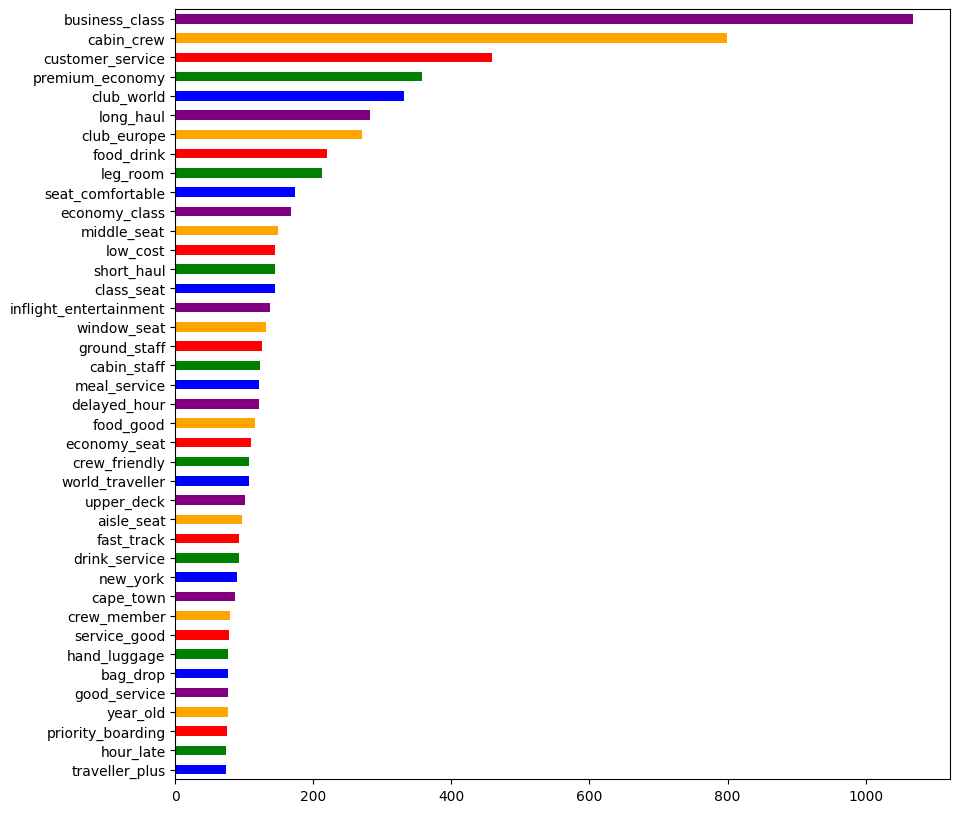

In [ ]:
import nltk.collocations as collocations
from nltk import FreqDist, bigrams

reviews = " ".join(df.corpus)

# Split the text of all reviews into a list of words
words = reviews.split(" ")

new_words = [word for word in words if word not in stopwords]

def get_freq_dist(new_words, number_of_ngrams):
    from nltk import ngrams

    # Generate n-grams
    ngrams_list = list(ngrams(new_words, number_of_ngrams))

    # Creating FreqDist
    ngram_fd = FreqDist(ngrams_list).most_common(40)

    # Sort values by highest frequency
    ngram_sorted = {k: v for k, v in sorted(ngram_fd, key=lambda item: item[1])}

    # Join n-gram tokens with '_' + maintain sorting
    ngram_joined = {'_'.join(k): v for k, v in sorted(ngram_fd, key=lambda item: item[1])}

    # Convert to Pandas series for easy plotting
    ngram_freqdist = pd.Series(ngram_joined)
    plt.figure(figsize=(10, 10))

    # Plotting with custom colors
    colors = ['blue', 'green', 'red', 'orange', 'purple']  # Add more colors if needed
    ax = ngram_freqdist.plot(kind="barh", color=colors[:len(ngram_freqdist)])

    return ax

get_freq_dist(new_words, 2)


We can see that there are very common positive terms regarding cabin crew. For example, cabin_crew_friendly_helpful, cabin_crew_friendly_attentive, cabin_crew_friendly_efficient, etc. So certainly customers are providing good reviews about cabin crew staff of British Airways.

However, there is one another approach that we can try to find the word frequencies which will give us better idea. We will group the reviews based on ratings. Say, we assume ratigs 1-3 are bad reviews, 4-6 are average/good experience and 7-10 indicates a great experience.

In [ ]:
ratings_1_3 = df[df.stars.isin([1,2,3])]
ratings_4_6 = df[df.stars.isin([4,5,6])]
ratings_7_10 = df[df.stars.isin([7,8,9,10])]

<Axes: >

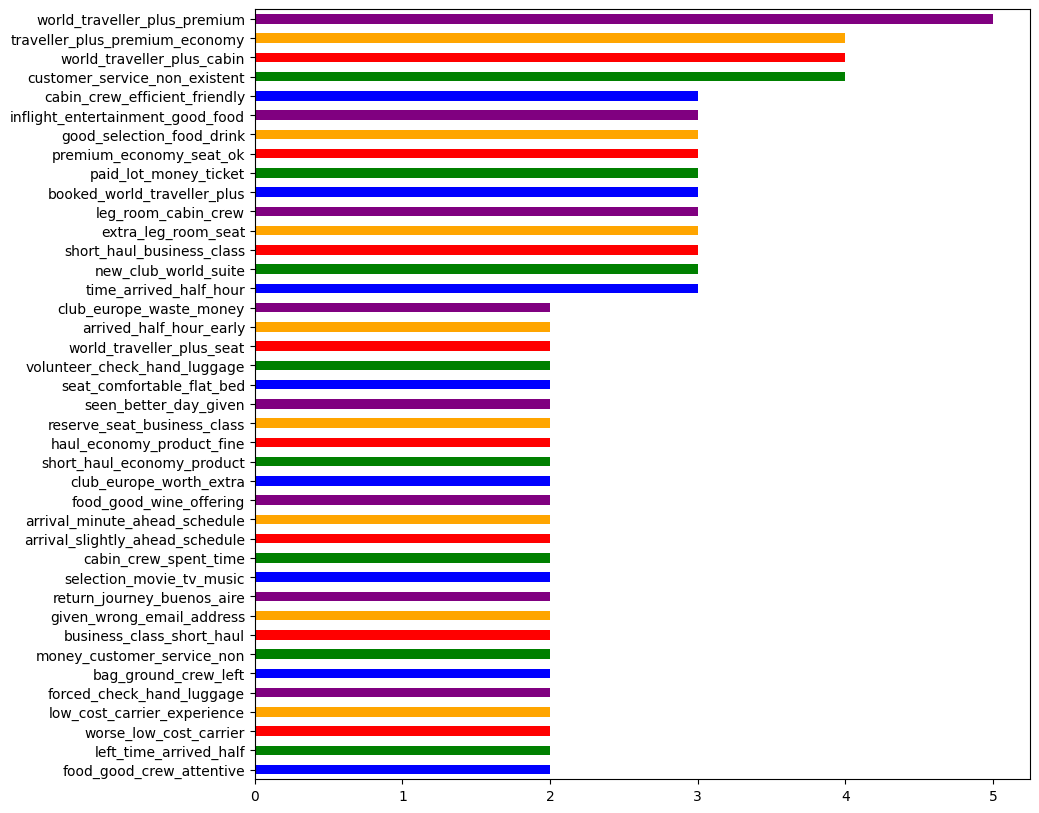

In [ ]:
reviews_1_3 = " ".join(ratings_1_3.corpus)
reviews_4_6 = " ".join(ratings_4_6.corpus)
reviews_7_10 = " ".join(ratings_7_10.corpus)

#split the text of all reviews into a list of words
words_1_3 = reviews_1_3.split(" ")
words_4_6 = reviews_4_6.split(" ")
words_7_10 = reviews_7_10.split(" ")


new_words_7_10 = [word for word in words_7_10 if word not in stopwords]

get_freq_dist(new_words_7_10,4)

<Axes: >

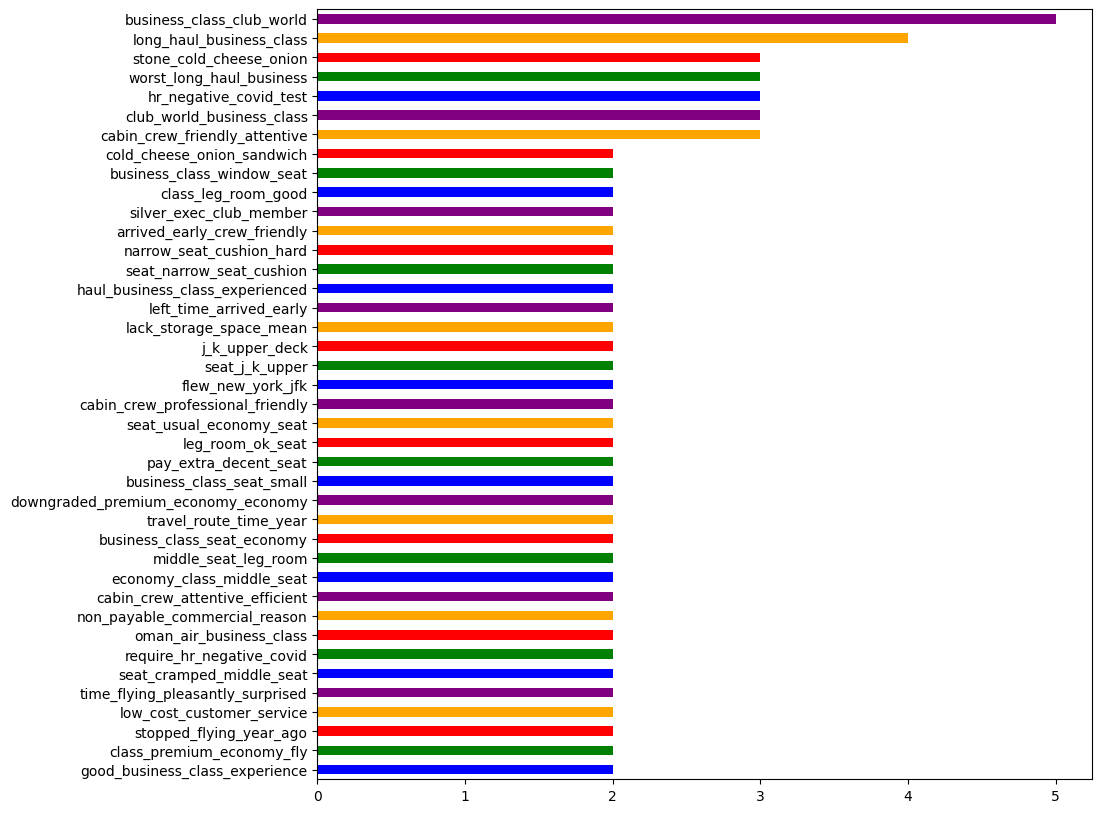

In [ ]:
new_words = [word for word in words_4_6 if word not in stopwords]

get_freq_dist(new_words,4)

<Axes: >

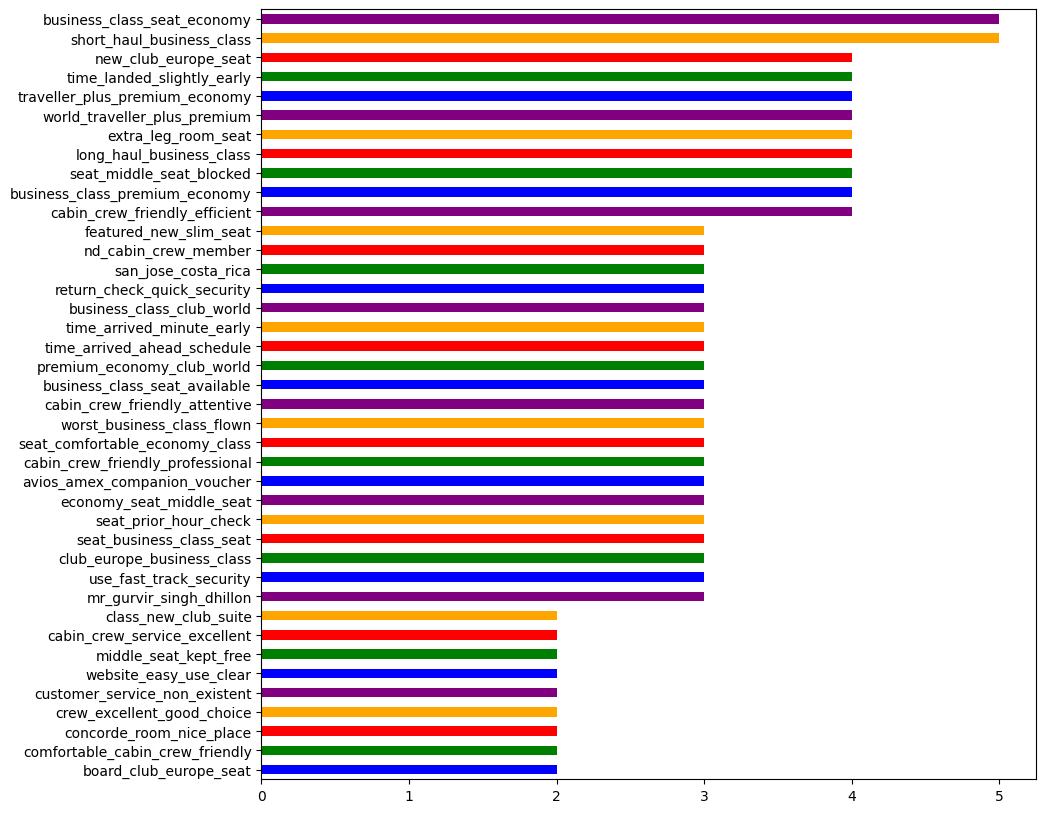

In [ ]:
new_words = [word for word in words_1_3 if word not in stopwords]

get_freq_dist(new_words,4)

Now we will use textblob library to define if the text is negative or positive and to what extent



In [ ]:
%%capture
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

#set a column Polarity with all 0 values initially
df['polarity'] = 0

for i in range(len(df.corpus)):
    sent= TextBlob(df.corpus[i])
    polarity  = sent.sentiment.polarity
    subjectivity  = sent.sentiment.subjectivity
    df['polarity'][i] = polarity

In [ ]:
# let's see how many texts are with positive comments

print(f"{df[(df['polarity'] >-0.2) & (df['polarity'] <0.2)].shape[0]} number of reviews between -0.2 and 0.2 polarity score")

print(f"{df[(df['polarity'] >-0.1) & (df['polarity'] <0.1)].shape[0]} number of reviews between -0.1 and 0.1 polarity score")

2335 number of reviews between -0.2 and 0.2 polarity score
1360 number of reviews between -0.1 and 0.1 polarity score


Polarity score is given between -1 to 1 and more close the value to -1, it indicates negative review and vice versa is true for positive value. If we consider a threshold where any review with polarity greater than 0.2 is positive and less than -0.2 is negative, we are left with 2286 reviews that lies in the neutral zone. To further narrow down this number of neutral reviews, let's take the threshold of 0.1.

We will try another method of labelling the reveiws as positives or negatives. In this we will use VADER algorihtm by nltk library.

In [ ]:
%%capture
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
vds = SentimentIntensityAnalyzer()
# text = 'This is an extremely entertaining movie'

#set a column Polarity with all 0 values initially
df['label'] = 0

for i in range(len(df.corpus)):

    score = vds.polarity_scores(df.corpus[i])['compound']
    #print(score)
    if score > 0.2:
        df['label'][i] = 1
        #print("1st")
    elif score < 0:
        df['label'][i] = -1
        #print("2nd")
    else:
        df['label'][i] = 0

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
df.label.value_counts()


 1    2149
-1    1145
 0     119
Name: label, dtype: int64

#Topic Modeling with LDA

We have already cleaned our reviews, however, for topic modeling we will also require word embeddings or (words matrix). For this purpose we will use count vectorizer method from sklearn library.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Assuming you already have df defined

# Creating the CountVectorizer object
vect = CountVectorizer()

# Fitting and transforming the text data
tf = vect.fit_transform(df.corpus).toarray()

# Accessing the feature names
tf_feature_names = vect.get_feature_names_out()

# Printing the feature names
print(tf_feature_names)


['aa' 'ab' 'aback' ... 'zum' 'zurich' 'zusammenschluss']


In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

#declare the number of topics
number_of_topics = 8

model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)

#fit the term frequency data to the model
model.fit(tf)

#create empty dictionary to store key value pair of topic number and its weights
topic_dict = {}

#loop through model components
for topic_idx, topic in enumerate(model.components_):
    topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(tf_feature_names[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
            for i in topic.argsort()[:-10 - 1:-1]]

df_topic =pd.DataFrame(topic_dict)


In [ ]:
df_topic

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights,Topic 6 words,Topic 6 weights,Topic 7 words,Topic 7 weights
0,flight,1198.5,flight,118.5,seat,282.7,seat,1458.0,flight,592.5,flight,574.8,flight,2206.9,flight,1438.4
1,ba,719.5,ba,95.4,class,221.4,flight,1090.7,seat,539.4,meal,501.9,ba,1195.8,seat,1011.0
2,service,429.0,business,74.6,economy,221.1,ba,1048.6,ba,499.6,seat,450.3,hour,851.1,good,941.5
3,time,398.3,class,74.2,business,200.7,class,924.5,food,360.7,drink,387.3,customer,596.8,ba,856.6
4,one,377.4,economy,65.0,flight,140.7,airway,796.6,british,345.4,crew,366.1,london,586.2,crew,717.5
5,staff,375.5,food,50.0,food,97.5,british,793.8,service,340.7,service,356.2,told,584.4,time,706.8
6,check,361.3,staff,43.3,london,91.0,business,723.9,airway,337.3,served,285.8,day,565.0,food,678.7
7,passenger,325.7,premium,42.9,premium,73.9,airline,609.3,good,335.0,cabin,285.0,airway,537.6,lounge,650.4
8,cabin,311.6,poor,42.5,middle,63.4,food,572.6,crew,326.0,breakfast,276.7,british,531.8,club,589.5
9,seat,305.7,review,41.2,airway,55.5,first,557.9,airline,316.7,offered,244.2,would,501.7,service,584.4


There are certain words that are not useful to detect the tone of the reviews overall like "britsh airways", "passenger", "flight", etc.



#Topic modeling with NMF

In [ ]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=2, init='random', random_state=0)
nmf.fit_transform(tf)

array([[0.01493969, 0.24566417],
       [0.10872502, 0.08270899],
       [0.08114298, 0.0144691 ],
       ...,
       [0.00946649, 0.01996252],
       [0.03478283, 0.18975902],
       [0.09000492, 0.30242368]])

In [ ]:
topic_dict = {}

#loop through model components
for topic_idx, topic in enumerate(nmf.components_):
    topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(tf_feature_names[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
            for i in topic.argsort()[:-10 - 1:-1]]

df_topic =pd.DataFrame(topic_dict)

In [ ]:
df_topic

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights
0,flight,30.9,seat,14.4
1,ba,10.7,ba,7.9
2,hour,7.3,class,6.5
3,time,5.8,business,5.1
4,london,5.7,food,5.0
5,airway,5.5,service,5.0
6,british,5.4,cabin,4.8
7,service,5.1,good,4.5
8,would,4.5,crew,4.5
9,airline,4.0,economy,4.0


With NMF algorithm as well we see there are few words that are not conclusive like "seat". So we will remove such words from the list and try topic modeling again.

# **Exploratory Data Analysis on Customer Bookings data for British Airways**

We will explore the customer data first to get to know it better in depth.

In [ ]:
#imports

import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
import pandas as pd

# Upload the CSV file
uploaded = files.upload()

# Read the CSV file
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")


Saving customer_booking.csv to customer_booking.csv


In [ ]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [ ]:
df.shape

(50000, 14)

In [ ]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

# Sales Channel

In [ ]:
per_internet = df.sales_channel.value_counts().values[0]  / df.sales_channel.count() *100
per_mobile = df.sales_channel.value_counts().values[1]  / df.sales_channel.count() *100

In [ ]:
print(f"Number of bookings done through internet: {per_internet} %")
print(f"Number of bookings done through phone call: {per_mobile} %")

Number of bookings done through internet: 88.764 %
Number of bookings done through phone call: 11.236 %


# Trip Type

In [ ]:
per_round = df.trip_type.value_counts().values[0]/ df.trip_type.count() *100
per_oneway = df.trip_type.value_counts().values[1]/ df.trip_type.count() *100
per_circle = df.trip_type.value_counts().values[2]/ df.trip_type.count() *100

In [ ]:
print(f"Percentage of round trips: {per_round} %")
print(f"Percentage of One way trips: {per_oneway} %")
print(f"Percentage of circle trips: {per_circle} %")

Percentage of round trips: 98.994 %
Percentage of One way trips: 0.774 %
Percentage of circle trips: 0.232 %


# Purchase Lead

<Axes: xlabel='purchase_lead', ylabel='Count'>

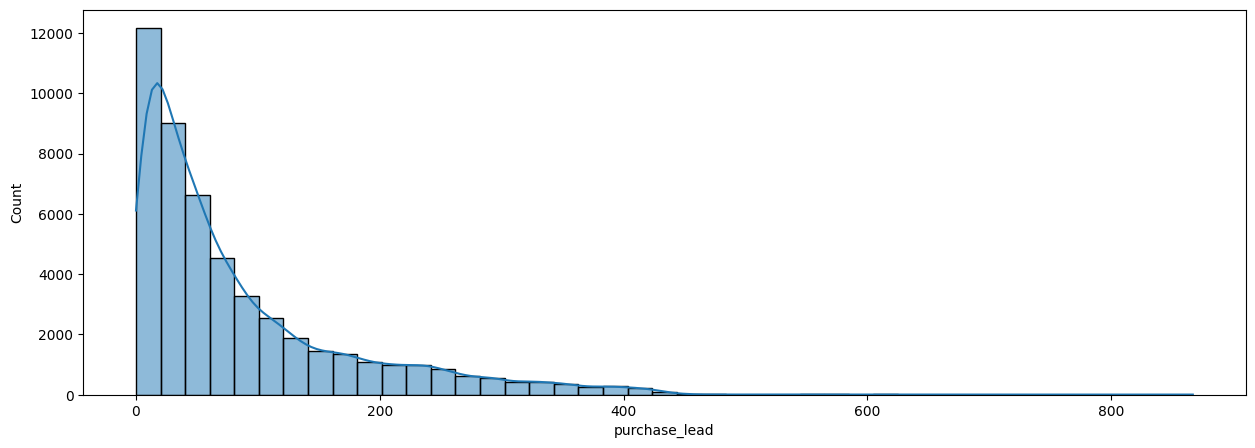

In [ ]:
plt.figure(figsize=(15,5))
sns.histplot(data=df, x="purchase_lead", binwidth=20,kde=True)

There are few bookings that were done more than 2 years before the travel date and it seems very unlikely that book that in advance. However, it might also be because of the cancellation and rebooking in a period of 6 months for twice. Generally airline keep the tickets for rebooking within a year. But at this point we will consider them as outliers which will effect the results of predictive model in a huge way.

In [ ]:
(df.purchase_lead >600).value_counts()

False    49992
True         8
Name: purchase_lead, dtype: int64

In [ ]:
df[df.purchase_lead > 600]

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
835,3,Internet,RoundTrip,641,46,6,Sun,AKLKUL,Malaysia,1,0,1,8.83,1
6148,1,Internet,RoundTrip,614,19,11,Wed,COKMEL,Australia,0,0,0,8.83,0
24119,1,Internet,RoundTrip,704,23,8,Tue,PNHSYD,Australia,0,0,0,8.58,0
38356,2,Internet,RoundTrip,633,5,10,Sat,HKTOOL,Australia,0,0,1,8.83,0
39417,1,Mobile,RoundTrip,625,5,15,Fri,ICNRGN,Myanmar (Burma),0,0,0,6.62,0
42916,1,Mobile,RoundTrip,605,6,18,Thu,BLRMEL,India,0,0,0,8.83,0
46716,2,Internet,RoundTrip,606,6,6,Fri,HKTTPE,United States,0,0,1,4.67,0
48259,3,Internet,RoundTrip,867,6,7,Mon,KIXMLE,Japan,0,0,1,7.00,1


In [ ]:
#filtering the data to have only purchase lead days less than 600 days
df = df[df.purchase_lead <600 ]

# Length Of Stay

<Axes: xlabel='length_of_stay', ylabel='Count'>

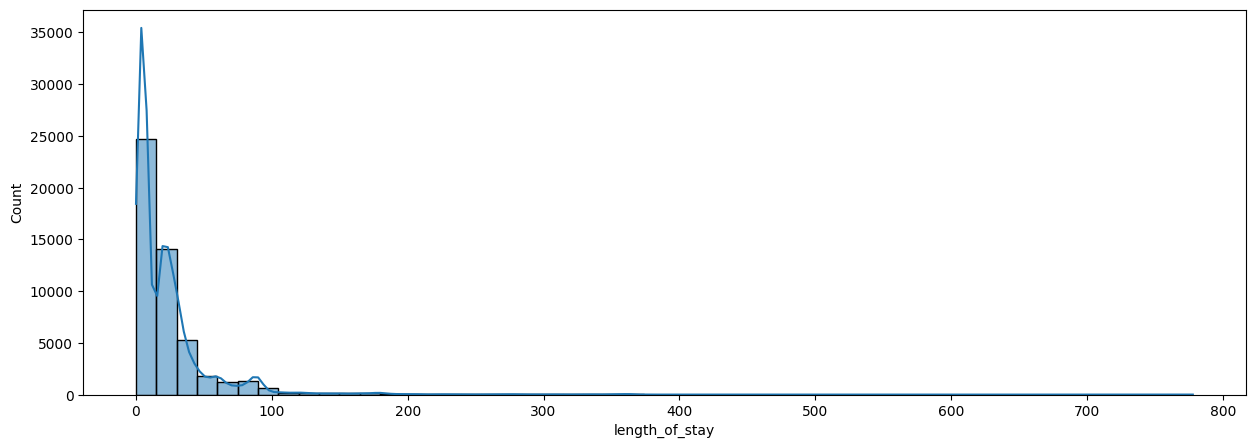

In [ ]:
plt.figure(figsize=(15,5))
sns.histplot(data=df, x="length_of_stay", binwidth=15,kde=True)

Let's see how many entries do we have that exceeds length of stay more than 100 days.

In [ ]:
(df.length_of_stay> 200).value_counts()

False    49713
True       279
Name: length_of_stay, dtype: int64

In [ ]:
df[df.length_of_stay> 500].booking_complete.value_counts()

0    9
1    1
Name: booking_complete, dtype: int64

We need to have more business knowledge to decide whether to remove these entries with more than 600 days of stay. There are could be many reasons for such bookings. But for now, we will just want to focus on bookings done for length of stay less than 500 days.

In [ ]:
#filtering the data to have only length of stay days less than 500 days
df = df[df.purchase_lead <500 ]

# Flight Day

We will map the flight day with a number of a week.

In [ ]:
mapping = {
    "Mon" : 1,
    "Tue" : 2,
    "Wed" : 3,
    "Thu" : 4,
    "Fri" : 5,
    "Sat" : 6,
    "Sun" : 7
}

df.flight_day = df.flight_day.map(mapping)

In [ ]:
df.flight_day.value_counts()

1    8100
3    7671
2    7670
4    7423
5    6759
7    6550
6    5809
Name: flight_day, dtype: int64

Most of the customers want to travel on Monday and choose Saturday as least preffered day as flight day.

# Booking Origin

Text(0, 0.5, 'Number of bookings')

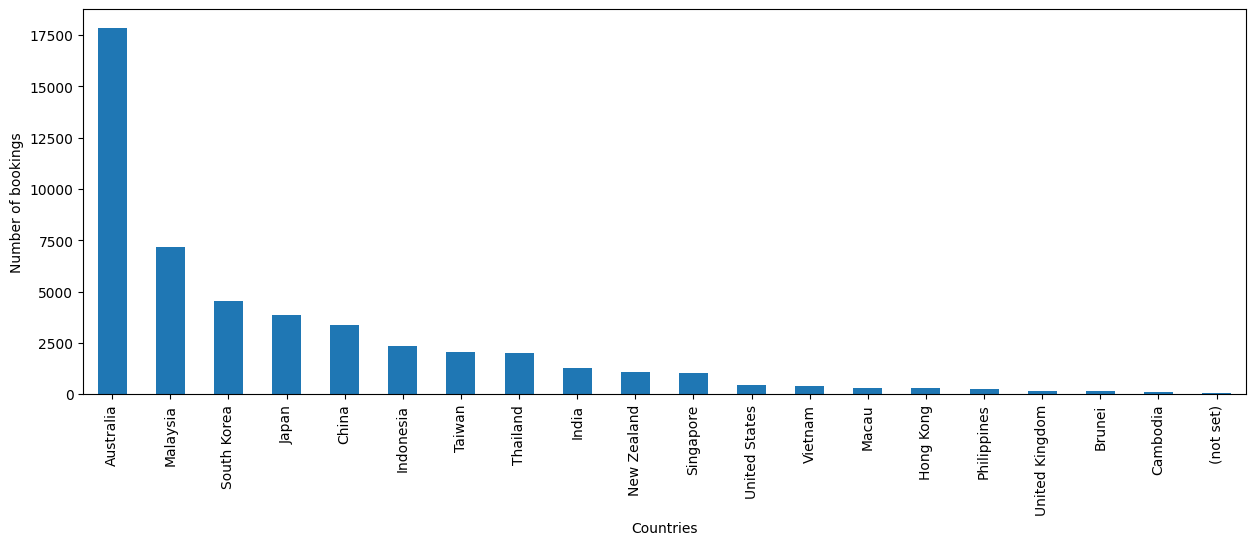

In [ ]:
plt.figure(figsize=(15,5))
ax = df.booking_origin.value_counts()[:20].plot(kind="bar")
ax.set_xlabel("Countries")
ax.set_ylabel("Number of bookings")

Above chart shows travellers from which country had maximum booking applications.



Text(0, 0.5, 'Number of complete bookings')

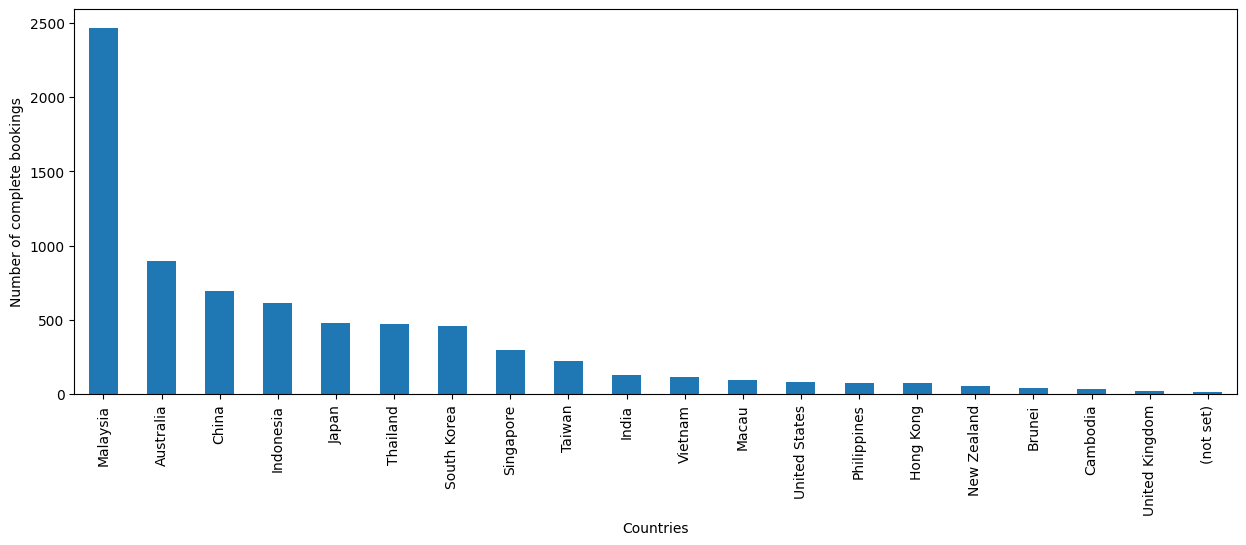

In [ ]:
plt.figure(figsize=(15,5))
ax = df[df.booking_complete ==1].booking_origin.value_counts()[:20].plot(kind="bar")
ax.set_xlabel("Countries")
ax.set_ylabel("Number of complete bookings")

Above chart shows travellers from which country had their booking complete.

# Booking complete

In [ ]:
successful_booking_per = df.booking_complete.value_counts().values[0] / len(df) * 100

In [ ]:
unsuccessful_booking_per = 100-successful_booking_per

In [ ]:
print(f"Out of 50000 booking entries only {round(unsuccessful_booking_per,2)} % bookings were successfull or complete.")

Out of 50000 booking entries only 14.96 % bookings were successfull or complete.


# Export the dataset to csv

In [ ]:
df.to_csv(cwd + "/filtered_customer_booking.csv")

# **Predictive Model**

In [ ]:
# imports

import pandas as pd
import numpy as np

import os

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams.update({'font.size': 14})

In [ ]:
# get current working directory
cwd = os.getcwd()

df = pd.read_csv(cwd + "/filtered_customer_booking.csv", index_col=0)

In [ ]:
df = df.reset_index(drop=True)

In [ ]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49977,2,Internet,RoundTrip,27,6,9,6,PERPNH,Australia,1,0,1,5.62,0
49978,1,Internet,RoundTrip,111,6,4,7,PERPNH,Australia,0,0,0,5.62,0
49979,1,Internet,RoundTrip,24,6,22,6,PERPNH,Australia,0,0,1,5.62,0
49980,1,Internet,RoundTrip,15,6,11,1,PERPNH,Australia,1,0,1,5.62,0


We will one hot encode the categorical columns.

In [ ]:
df_final = df

In [ ]:
from sklearn.preprocessing import OneHotEncoder


#create instance of one hot encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#one hot encode Sales Channel
encoder_df = pd.DataFrame(encoder.fit_transform(df[["sales_channel"]]).toarray())
encoder_df = encoder_df.rename(columns={0:'Internet', 1:'Mobile'})
df_final = df_final.join(encoder_df)

#one hot encode trip type
encoder_df = pd.DataFrame(encoder.fit_transform(df[["trip_type"]]).toarray())
encoder_df = encoder_df.rename(columns={0:'RoundTRip', 1:'OneWayTrip',2:'CircleTrip'})
df_final = df_final.join(encoder_df)

In [ ]:
#drop categorical columns now
df_final.drop(['sales_channel', 'trip_type','booking_origin', 'route'], axis=1, inplace = True)

In [ ]:
#store the label for supervised learning
label = df['booking_complete']

In [ ]:
df_final = df_final.drop('booking_complete', axis=1)

# Normalizaing the values

In [ ]:
from sklearn.preprocessing import StandardScaler

#create a standard scaler object
scaler = StandardScaler()

#fit and transform the data
scaled_df = scaler.fit_transform(df_final)

In [ ]:
#create a dataframe of scled data
scaled_df = pd.DataFrame(scaled_df, columns = df_final.columns)

In [ ]:
# add the labels back to the dataframe
scaled_df['label']  = label

In [ ]:
scaled_df

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,Internet,Mobile,RoundTRip,OneWayTrip,CircleTrip,label
0,0.400769,1.971093,-0.119401,-0.381588,1.096876,0.703587,-0.650054,-0.863557,-1.174049,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
1,-0.579424,0.302987,-0.089895,-1.120618,1.096876,-1.421288,-0.650054,-0.863557,-1.174049,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
2,0.400769,1.759799,-0.030885,1.465988,-0.408618,0.703587,1.538334,-0.863557,-1.174049,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
3,-0.579424,0.125056,0.234662,-0.935861,1.096876,-1.421288,-0.650054,1.158002,-1.174049,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
4,0.400769,-0.186323,-0.030885,1.096473,-0.408618,0.703587,-0.650054,1.158002,-1.174049,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49977,0.400769,-0.642272,-0.502969,-0.012073,1.096876,0.703587,-0.650054,1.158002,-1.107240,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
49978,-0.579424,0.291867,-0.502969,-0.935861,1.598707,-1.421288,-0.650054,-0.863557,-1.107240,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
49979,-0.579424,-0.675634,-0.502969,2.389776,1.096876,-1.421288,-0.650054,1.158002,-1.107240,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
49980,-0.579424,-0.775721,-0.502969,0.357443,-1.412280,0.703587,-0.650054,1.158002,-1.107240,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0


# Correlation matrix

<Axes: >

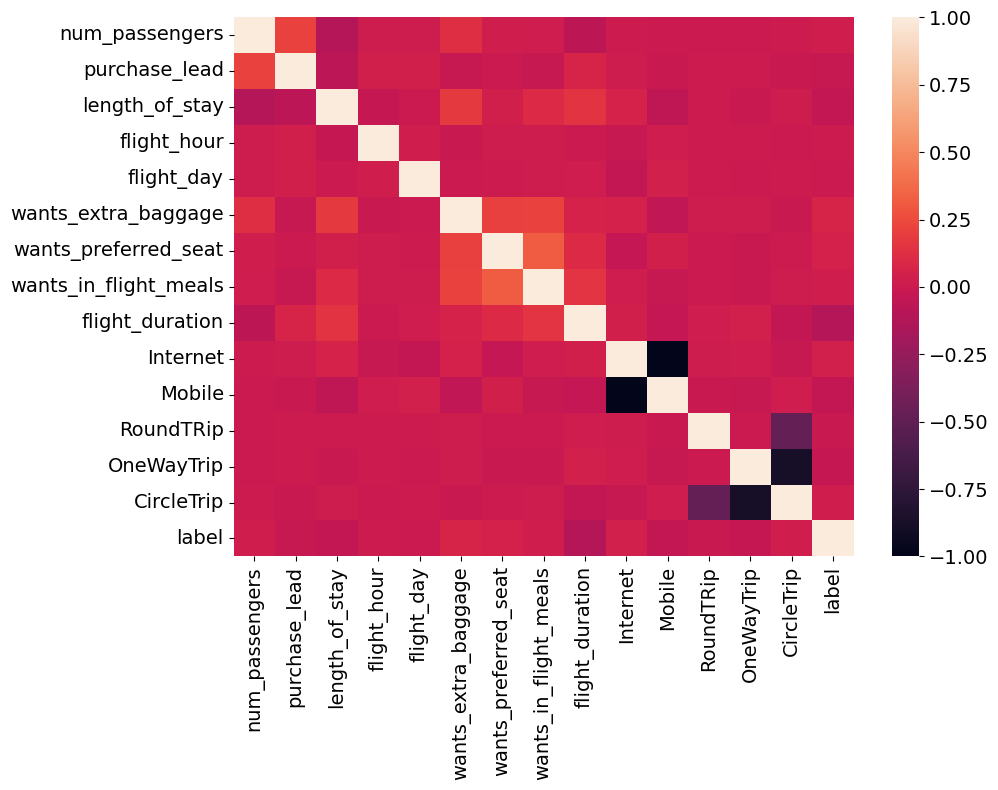

In [ ]:
corr = scaled_df.corr()

plt.figure(figsize=(10,7))

#plot the heatmap
sns.heatmap(corr)

Now let's split the dataset into train and test sets.

# Splitting Train and Test Data

In [ ]:
from sklearn.model_selection import train_test_split

X = scaled_df.iloc[:,:-1]
y = scaled_df['label']

X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.20, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.inspection import permutation_importance

from yellowbrick.classifier import ConfusionMatrix
from sklearn.model_selection import GridSearchCV,  RepeatedStratifiedKFold

In [ ]:
"""
    Create functions to fit and predict the values of whether customer would complete the booking.
    Also functions with metrics to evaluate the model prediction.

"""

def model_fit_predict(model, X, y, X_predict):
    model.fit(X, y)
    return model.predict(X_predict)

def acc_score(y_true, y_pred):
    return accuracy_score(y_true, y_pred)

def pre_score(y_true, y_pred):
    return precision_score(y_true, y_pred)

def f_score(y_true, y_pred):
    return f1_score(y_true, y_pred)

# **Random Forest Classifier**

In [ ]:
#create an instance of the classifier and fit the training data
clf_rf = RandomForestClassifier(max_depth =50 , min_samples_split=5,random_state=0)

# Checking Training accuracy

In [ ]:
y_pred_train = model_fit_predict(clf_rf, X_train, y_train, X_train)
set(y_pred_train)

#f1 score for training data
f1 = round(f1_score(y_train, y_pred_train),2)

#accuracy score for training data
acc = round(accuracy_score(y_train, y_pred_train),2)

#precision score for training data
pre = round(precision_score(y_train, y_pred_train),2)

print(f"Accuracy, precision and f1-score for training data are {acc}, {pre} and {f1} respectively")

Accuracy, precision and f1-score for training data are 0.93, 1.0 and 0.72 respectively


0.9341002876078529

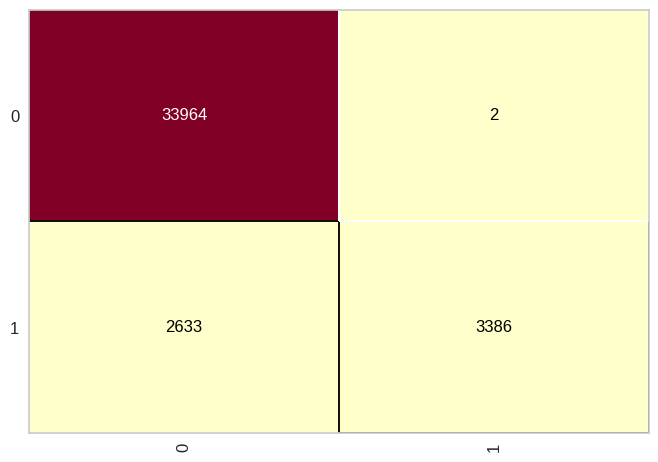

In [ ]:
cm = ConfusionMatrix(clf_rf, classes=[0,1])
cm.fit(X_train, y_train)

cm.score(X_train, y_train)

#Checking Testing accuracy

In [ ]:
#create an instance of the classifier and fit the training data
clf_rf = RandomForestClassifier(max_depth =50 , min_samples_split=5,random_state=0)

y_pred_test = model_fit_predict(clf_rf, X_train, y_train, X_test)

#f1 score for training data
f1 = round(f1_score(y_test, y_pred_test),2)

#accuracy score for training data
acc = round(accuracy_score(y_test, y_pred_test),2)

#precision score for training data
pre = round(precision_score(y_test, y_pred_test),2)

print(f"Accuracy, precision and f1-score for training data are {acc}, {pre} and {f1} respectively")

Accuracy, precision and f1-score for training data are 0.86, 0.56 and 0.07 respectively


0.8554566369910973

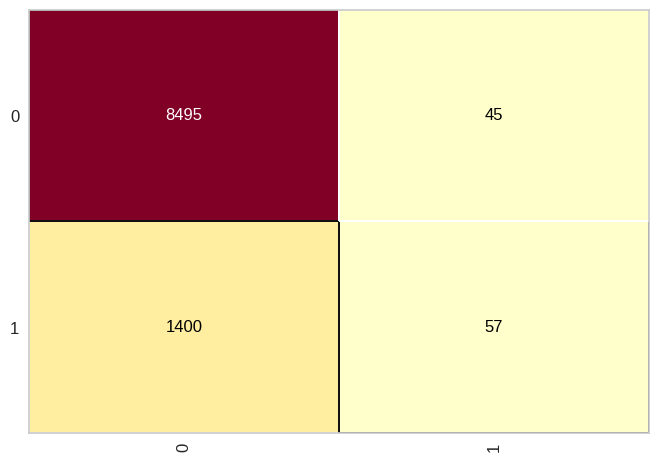

In [ ]:
cm = ConfusionMatrix(clf_rf, classes=[0,1])
cm.fit(X_train, y_train)

cm.score(X_test, y_test)

Text(0.5, 0, 'Random Forest Feature Importance')

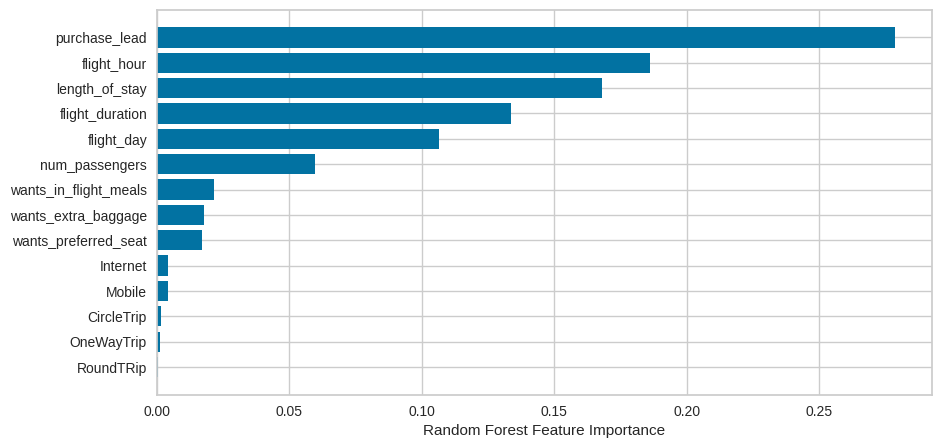

In [ ]:
plt.figure(figsize=(10,5))
sorted_idx = clf_rf.feature_importances_.argsort()
plt.barh(scaled_df.iloc[:,:-1].columns[sorted_idx], clf_rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

One major problem behind getting low F1 score is imbalanced dataset. We have higher entries that are classified 0 than 1. We could reduce the number of entries that are classified 0 to be equal around the number of entries that are classified as 1.

# Balancing the dataset

In [ ]:
scaled_df.label.value_counts()

0    42506
1     7476
Name: label, dtype: int64

In [ ]:
#create a dataframe having all labels 0 with 10000 samples
scaled_df_0 = scaled_df[scaled_df.label ==0].sample(n=8000)

In [ ]:
#concatenate the two dataframee, one havng all labels 0 and other having all labels as 1
scaled_df_new = pd.concat([scaled_df[scaled_df.label==1], scaled_df_0], ignore_index=True)

In [ ]:
#shuffle the dataframe rows
scaled_df_new = scaled_df_new.sample(frac = 1).reset_index(drop=True)

In [ ]:
scaled_df_new

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,Internet,Mobile,RoundTRip,OneWayTrip,CircleTrip,label
0,-0.579424,-0.608910,-0.030885,-0.566346,0.093214,0.703587,-0.650054,-0.863557,-1.107240,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
1,-0.579424,-0.853566,0.028126,0.726958,-1.412280,0.703587,1.538334,-0.863557,-0.185282,0.355786,-0.355786,-0.048231,-0.088336,0.100826,1
2,-0.579424,-0.697876,-0.502969,0.542200,-0.910449,0.703587,1.538334,1.158002,-1.107240,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
3,-0.579424,-0.342013,-0.502969,0.726958,-0.408618,-1.421288,-0.650054,-0.863557,-0.572772,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
4,-0.579424,0.859023,0.028126,-0.381588,-0.910449,0.703587,1.538334,1.158002,0.870293,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15471,0.400769,1.459540,-0.591484,-0.566346,1.598707,-1.421288,1.538334,-0.863557,-0.185282,0.355786,-0.355786,-0.048231,-0.088336,0.100826,1
15472,-0.579424,-0.809083,-0.148906,0.357443,0.595045,0.703587,-0.650054,1.158002,-1.741921,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
15473,-0.579424,1.715317,-0.532474,1.281231,0.595045,-1.421288,-0.650054,-0.863557,-1.741921,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
15474,0.400769,1.837644,-0.502969,1.281231,1.598707,0.703587,1.538334,-0.863557,0.195526,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0


In [ ]:
X = scaled_df_new.iloc[:,:-1]
y = scaled_df_new['label']

X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.20, random_state=42)

In [ ]:
#create an instance of the classifier and fit the training data
clf_rf = RandomForestClassifier(n_estimators=50,max_depth =50 , min_samples_split=5,random_state=0)

In [ ]:
y_pred_test = model_fit_predict(clf_rf, X_train, y_train, X_test)

#f1 score for training data
f1 = round(f1_score(y_test, y_pred_test),2)

#accuracy score for training data
acc = round(accuracy_score(y_test, y_pred_test),2)

#precision score for training data
pre = round(precision_score(y_test, y_pred_test),2)

recall = round(recall_score(y_test, y_pred_test),2)

specificity = round(recall_score(y_test, y_pred_test, pos_label=0),2)

print(f"Accuracy, precision, recall and f1-score for training data are {acc}, {pre}, {recall}, {specificity} and {f1} respectively")

Accuracy, precision, recall and f1-score for training data are 0.63, 0.62, 0.59, 0.67 and 0.6 respectively


0.6275839793281653

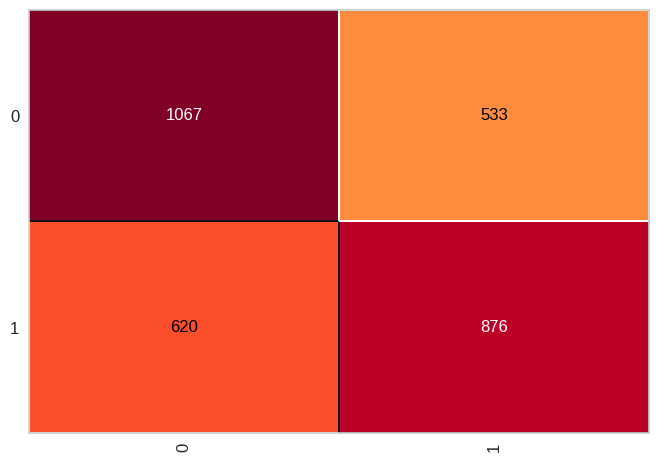

In [ ]:
cm = ConfusionMatrix(clf_rf, classes=[0,1])
cm.fit(X_train, y_train)

cm.score(X_test, y_test)

Text(0.5, 0, 'Random Forest Feature Importance')

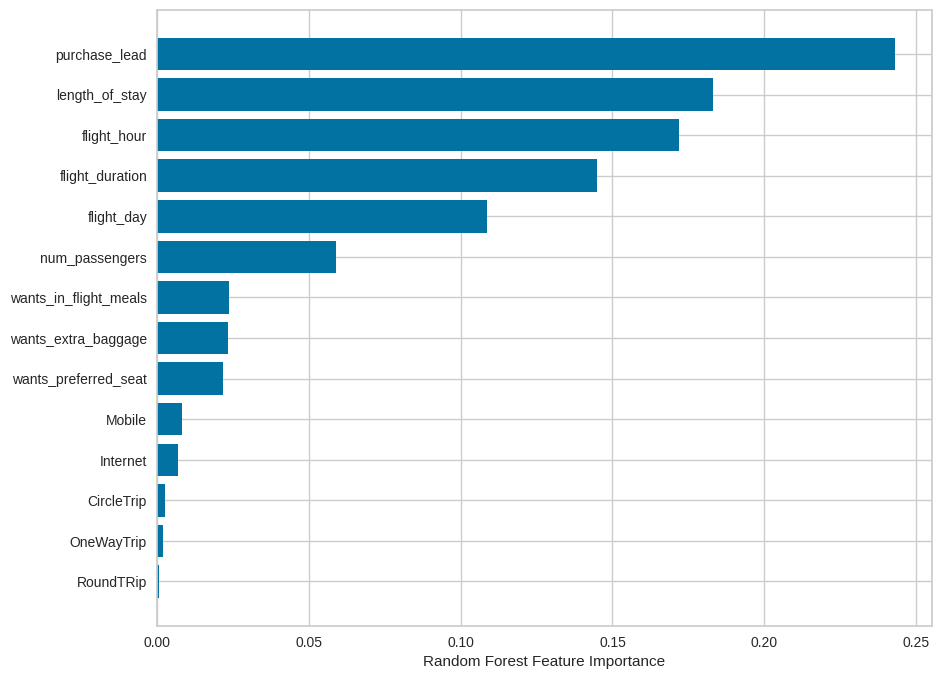

In [ ]:
plt.figure(figsize=(10,8))
sorted_idx = clf_rf.feature_importances_.argsort()
plt.barh(scaled_df.iloc[:,:-1].columns[sorted_idx], clf_rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")